In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
from bokeh.models import Legend, HoverTool, ColumnDataSource
from bokeh.layouts import gridplot


###### For EU dataset ###### 
excel_file_EU = 'EU_disasters.xlsx'

df = pd.read_excel(excel_file_EU)

df.drop(columns=['Historic', 'Classification Key','External IDs', 'Event Name','OFDA/BHA Response','Appeal','Declaration',"AID Contribution ('000 US$)", 'Magnitude','Magnitude Scale', 'Latitude','Longitude','River Basin','Start Day','Total Deaths','No. Injured','No. Affected','No. Homeless','Total Affected',"Reconstruction Costs ('000 US$)", 
                 "Reconstruction Costs, Adjusted ('000 US$)","Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)","Total Damage, Adjusted ('000 US$)",'CPI', "Admin Units","Entry Date", 'Last Update','Origin','Associated Types'], inplace=True)


df['Start Year'] = pd.to_datetime(df['Start Year'], format='%Y').dt.year

##### For WorldWide dataset #####
excel_file_World = 'WW.xlsx'

df_world = pd.read_excel(excel_file_World)
df_world.drop(columns=['Historic', 'Classification Key','External IDs', 'Event Name','OFDA/BHA Response','Appeal','Declaration',"AID Contribution ('000 US$)", 'Magnitude','Magnitude Scale', 'Latitude','Longitude','River Basin','Start Day','Total Deaths','No. Injured','No. Affected','No. Homeless','Total Affected',"Reconstruction Costs ('000 US$)", 
                 "Reconstruction Costs, Adjusted ('000 US$)","Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)","Total Damage, Adjusted ('000 US$)",'CPI', "Admin Units","Entry Date", 'Last Update','Origin','Associated Types'], inplace=True)


df_world['Start Year'] = pd.to_datetime(df['Start Year'], format='%Y').dt.year



###### global values
generic_colors = ['red', 'yellow', 'purple', 'blue', 'green', 'black', 'gray', 'pink', 'brown',
                  'skyblue', 'darkorange', 'lightseagreen', 'cyan', 'magenta', 'lime', 'gold',
                  'indigo', 'teal', 'salmon', 'peru', 'olive', 'orchid', 'steelblue','black']

disaster_colors = {
    "Flood": "blue",
    "Storm": "red",
    "Earthquake": "green",
    "Epidemic": "orange",
    "Glacial lake outburst flood": "purple",
    "Extreme temperature" :"magenta",
    "Mass movement (wet)":"lime",
    "Volcanic activity":"indigo",
    "Wildfire":"steelblue",
    "Drought":"peru",
    "Impact": "teal",
    "Infestation":"olive",
    "Mass movement (dry)":"magenta",
}


In [4]:
###### Filter the two dataset to only consider the natural disasters ######


###### For EU dataset ######
filter_natural = df[df['Disaster Group'] == 'Natural']

grouped_natural_disaster = filter_natural.groupby('Disaster Group')

###### For EU dataset ######

filter_natural_world = df_world[df_world['Disaster Group'] == 'Natural']

grouped_natural_disaster_world = filter_natural_world.groupby('Disaster Group')

# EU 

### sum of all disaster each year

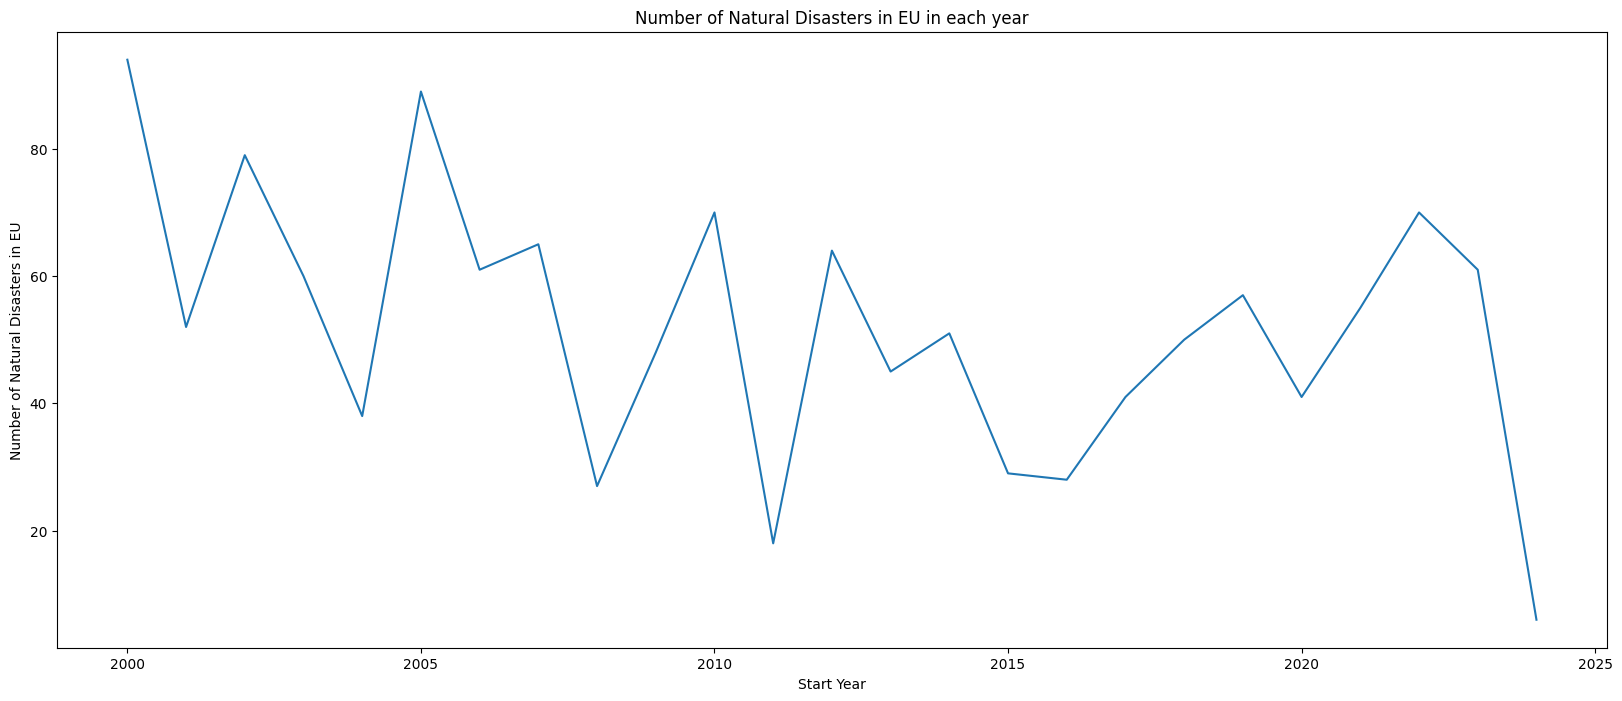

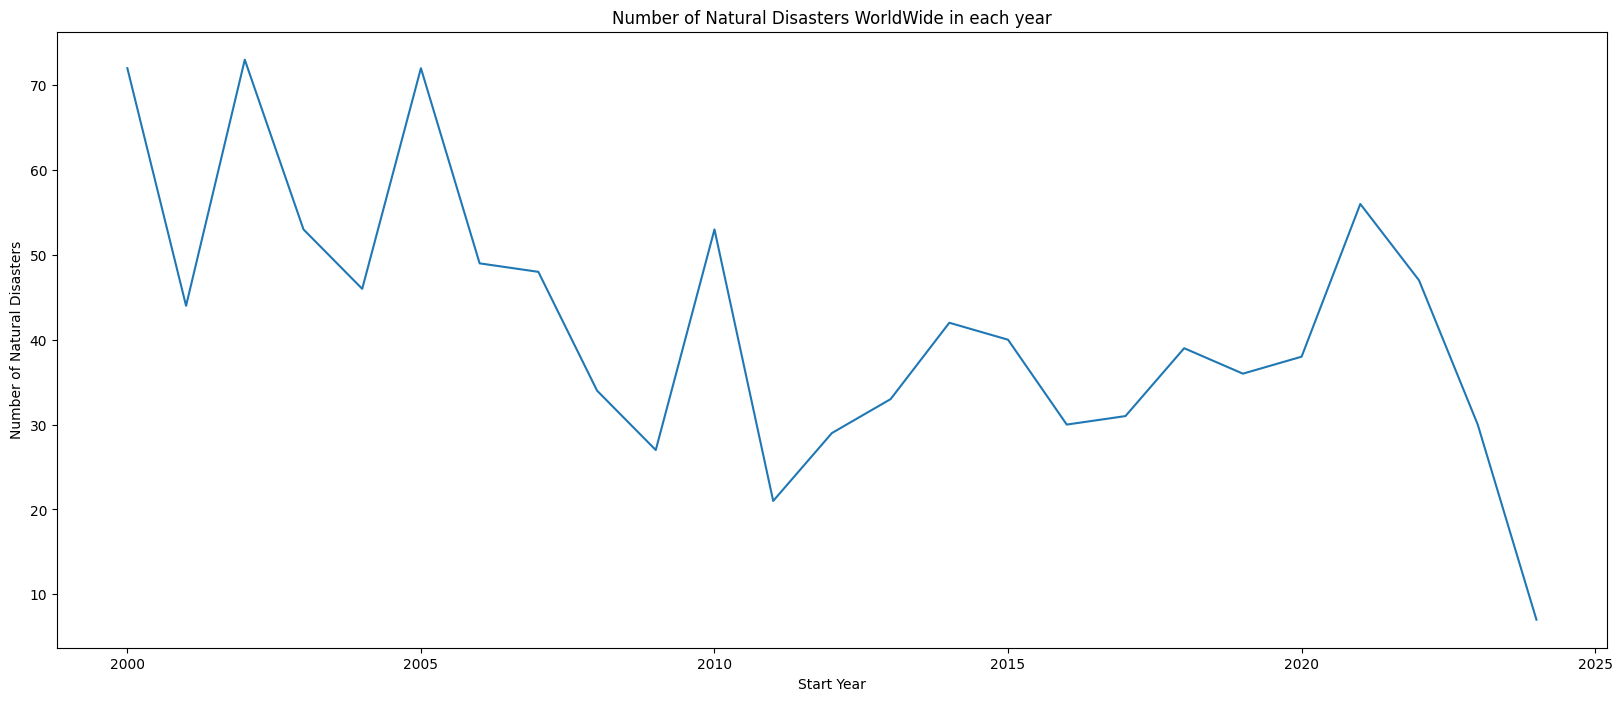

In [5]:
###### Plot for the sum of all disasters each year ######

###### For EU ######
grouped_start_year = filter_natural.groupby('Start Year').size()

plt.figure(figsize=(20, 8))

plt.plot(grouped_start_year.index, grouped_start_year.values)

plt.xlabel('Start Year')
plt.ylabel('Number of Natural Disasters in EU')
plt.title('Number of Natural Disasters in EU in each year')

plt.savefig("natural_disasters_all_year_plot_EU.png")

plt.show()


###### For WorldWide ######
grouped_start_year_World = filter_natural_world.groupby('Start Year').size()


plt.figure(figsize=(20, 8))

plt.plot(grouped_start_year_World.index, grouped_start_year_World.values)

plt.xlabel('Start Year')
plt.ylabel('Number of Natural Disasters')
plt.title('Number of Natural Disasters WorldWide in each year')


plt.savefig("natural_disasters_all_year_plot_WW.png")

plt.show()


In [15]:
from bokeh.plotting import figure, output_file, save
from bokeh.models import FixedTicker, HoverTool

# Create the figure
p = figure(title="Number of Natural Disasters in EU in each year", x_axis_label='Start Year', y_axis_label='Number of Natural Disasters in EU', width=800, height=400)

# Plot the data
p.line(grouped_start_year.index, grouped_start_year.values, line_width=2)

p.xaxis.ticker = FixedTicker(ticks=grouped_start_year.index.tolist())
p.xaxis.major_label_orientation = np.pi / 4

hover = HoverTool()
hover.tooltips = [("Year", "@x"), ("Occurrences", "@y")]
p.add_tools(hover)


# Save the plot
output_file("natural_disasters_all_year_plot_EU.html")
show(p)


# disaster type in each year (individual plot)

In [16]:
###### Plot occurences of all disaster type for EU and WW ######

###### Defining the method ######

def plot_diaster_types(dataset, colors, string, title):
    p = figure(x_range=dataset.index.astype(str).tolist(), width=800, height=400, title=title,
            toolbar_location=None, tools="")

    disaster_types = dataset.columns.tolist()
    bar_width = 1 / len(disaster_types)  
    renderers = [] 

    for i, disaster_type in enumerate(disaster_types):
        x_pos = [year + i * bar_width for year in range(len(dataset))]
        source = ColumnDataSource(data=dict(x=x_pos, top=dataset[disaster_type], name=[disaster_type] * len(x_pos), year=dataset.index.astype(str).tolist()))

        renderer = p.vbar(x='x', top='top', width=bar_width, color=colors[disaster_type], source=source)
        renderers.append(renderer)  
    p.xaxis.axis_label = 'Year'
    p.yaxis.axis_label = 'Number of Disasters'
    p.xaxis.major_label_orientation = np.pi / 4

    hover = HoverTool(tooltips=[("Year", "@year"), ("Disaster Type", "@name"), ("Occurrence", "@top")], renderers=renderers)
    p.add_tools(hover)

    legend_items = [(disaster_type, [renderer]) for disaster_type, renderer in zip(disaster_types, renderers)]
    legend = Legend(items=legend_items, location="top_right", click_policy='hide')
    p.add_layout(legend, 'right')

    output_file(string + ".html")
    show(p)


###### Plot  for EU ######
grouped_year = filter_natural.groupby(['Start Year', 'Disaster Type']).size().unstack(fill_value=0)
plot_diaster_types(grouped_year, disaster_colors, "plot_disaster_EU_all_years", "Number of Natural Disasters by Type and Year in EU")

###### Plot for WW ######
# grouped_year_world = filter_natural_world.groupby(['Start Year', 'Disaster Type']).size().unstack(fill_value=0)
# plot_diaster_types(grouped_year_world, disaster_colors, "plot_disaster_worldwide_all_years", "Number of Natural Disasters by Type and Year WorldWide")


In [6]:
##### Plot for each disaster type in each year world wide (individual plot)

# def plot_diaster_types(dataset, colors, string):
#     p = figure(x_range=dataset.index.astype(str).tolist(), height=400, width=800, title="Number of Natural Disasters WorldWide",
#             toolbar_location=None, tools="")

#     disaster_types = dataset.columns.tolist()
#     bar_width = 1 / len(disaster_types)  
#     renderers = [] 

#     for i, disaster_type in enumerate(disaster_types):
#         x_pos = [year + i * bar_width for year in range(len(dataset))]
#         source = ColumnDataSource(data=dict(x=x_pos, top=dataset[disaster_type], name=[disaster_type] * len(x_pos), year=grouped_year_world.index.astype(str).tolist()))

#         renderer = p.vbar(x='x', top='top', width=bar_width, color=colors[disaster_type], source=source)
#         renderers.append(renderer)  
#     p.xaxis.axis_label = 'Year'
#     p.yaxis.axis_label = 'Number of Disasters'
#     p.xaxis.major_label_orientation = np.pi / 4

#     hover = HoverTool(tooltips=[("Year", "@year"), ("Disaster Type", "@name"), ("Occurrence", "@top")], renderers=renderers)
#     p.add_tools(hover)

#     legend_items = [(disaster_type, [renderer]) for disaster_type, renderer in zip(disaster_types, renderers)]
#     legend = Legend(items=legend_items, location="top_right", click_policy='hide')
#     p.add_layout(legend, 'right')

#     output_file(string + ".html")

#     show(p)



# EU

In [22]:
###### Plot for selected countries
grouped_country = filter_natural.groupby(['Country', 'Start Year', 'Disaster Type']).size().unstack(fill_value=0)

countries = grouped_country.index.get_level_values('Country').unique()
print(countries)

def disastertypes_country(dataset, countries, colors, name_of_file):
    plots = []

    num_countries = len(countries)
    plots_per_row = 2
    num_rows = (num_countries + plots_per_row - 1) // plots_per_row

    disaster_names = []

    for idx, country in enumerate(countries):
        country_data = dataset.loc[country]
        disaster_types = country_data.columns
        
        all_years = np.arange(country_data.index.min(), country_data.index.max() + 1)

        non_zero_disasters = [disaster_type for disaster_type in disaster_types if country_data[disaster_type].sum() > 0]

        p = figure(title=f'Number of Natural Disasters by Type and Year in {country}',
                    x_axis_label='Year', y_axis_label='Number of Disasters',
                    x_range=(min(all_years)-1, max(all_years)+1), width=800, height=400)

        plotted_disaster_types = []

        for i, disaster_type in enumerate(non_zero_disasters):
            x = all_years
            y = country_data[disaster_type].reindex(all_years, fill_value=0)
            source = ColumnDataSource(data=dict(x=x, y=y, name=[disaster_type] * len(x)))
            bars = p.vbar(x='x', top='y', width=0.8, color=colors[disaster_type], alpha=0.5, source=source)
            plotted_disaster_types.append((disaster_type, [bars]))
            disaster_names.append(disaster_type)  

        p.xaxis.ticker = all_years
        p.xaxis.major_label_orientation = np.pi / 4
        p.yaxis.ticker = np.arange(0, 6, 1)
        legend = Legend(items=plotted_disaster_types, location="top_left", click_policy="hide")
        legend.spacing = 5
       # legend.label_text_font_size = "6pt"
        p.add_layout(legend, 'right')

        #tooltips = [("Year", "@x"), ("Disaster Type", "@name"), ("Occurrences", "@y")]
        # hover = HoverTool(tooltips=tooltips, mode="vline")
        # p.add_tools(hover)

        plots.append(p)

    grid = gridplot(plots, ncols=plots_per_row)

    output_file(name_of_file + ".html")
    show(grid)

    

#disastertypes_country(grouped_country, countries, disaster_colors, " TEST")


##################### PLOTS FOR EU ####################

#1. Highest Germany
countries_to_include_estonia = ['Germany']
disastertypes_country(grouped_country, countries_to_include_estonia, disaster_colors, "Germany_EU")


#2. Highest Italy 
countries_to_include_sweden = ['Italy']
disastertypes_country(grouped_country, countries_to_include_sweden, disaster_colors, "Italy_EU")


# 1. lowest Malta
countries_to_include_malta = ['Malta']
disastertypes_country(grouped_country, countries_to_include_malta, disaster_colors, "Malta_EU")

# 2. lowest Latvia
countries_to_include_malta = ['Latvia']
disastertypes_country(grouped_country, countries_to_include_malta, disaster_colors, "Latvia_EU")

#Joker
countries_to_include_italy = ['Sweden']
disastertypes_country(grouped_country, countries_to_include_italy, disaster_colors, "Sweden_EU")


##################### PLOTS FOR WW ####################
grouped_country_WW = filter_natural_world.groupby(['Country', 'Start Year', 'Disaster Type']).size().unstack(fill_value=0)

# 1. Highest WW
countries_to_include_WW_China = ['China']
disastertypes_country(grouped_country_WW, countries_to_include_WW_China, disaster_colors, "China_WW")


# 2. Highest WW
countries_to_include_WW_China = ['United States of America']
disastertypes_country(grouped_country_WW, countries_to_include_WW_China, disaster_colors, "USA_WW")



Index(['Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Isle of Man', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Montenegro', 'Netherlands (Kingdom of the)', 'North Macedonia',
       'Norway', 'Poland', 'Portugal', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Serbia', 'Serbia Montenegro', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland'],
      dtype='object', name='Country')


# NO MORE

In [8]:
###### For the highest emission in EU besides Luxemborg- Estonia

countries_to_include = ['Estonia']

plots = []

num_countries = len(countries_to_include)
plots_per_row = 2
num_rows = (num_countries + plots_per_row - 1) // plots_per_row

disaster_names = []

for idx, country in enumerate(countries_to_include):
    country_data = grouped_country.loc[country]
    disaster_types = country_data.columns
    
    all_years = np.arange(country_data.index.min(), country_data.index.max() + 1)

    non_zero_disasters = [disaster_type for disaster_type in disaster_types if country_data[disaster_type].sum() > 0]

    p = figure(title=f'Number of Natural Disasters by Type and Year in {country}',
                x_axis_label='Year', y_axis_label='Number of Disasters',
                  x_range=(min(all_years)-1, max(all_years)+1), width = 475, height = 250)

    plotted_disaster_types = []

    for i, disaster_type in enumerate(non_zero_disasters):
        x = all_years
        y = country_data[disaster_type].reindex(all_years, fill_value=0)
        source = ColumnDataSource(data=dict(x=x, y=y, name=[disaster_type] * len(x)))
        bars = p.vbar(x='x', top='y', width=0.8, color=disaster_colors[disaster_type], alpha=0.5, source=source)
        plotted_disaster_types.append((disaster_type, [bars]))
        disaster_names.append(disaster_type)  

    p.xaxis.ticker = all_years
    p.xaxis.major_label_orientation = "vertical"
    p.yaxis.ticker = np.arange(0, 6, 1)
    legend = Legend(items=plotted_disaster_types, location="top_left", click_policy="hide")
    legend.spacing = 5
    legend.label_text_font_size = "6pt"
    p.add_layout(legend, 'right')

    plots.append(p)

grid = gridplot(plots, ncols=plots_per_row)

show(grid)

#output_file("natural_disasters_highest_emission_EU.html")

In [9]:
###### For the lowest emission in EU - Malta is the lowest and Sweden is the lowest

countries_to_include = ['Malta', 'Sweden']

plots = []

disaster_names = []

for idx, country in enumerate(countries_to_include):
    country_data = grouped_country.loc[country]
    disaster_types = country_data.columns
    
    all_years = np.arange(country_data.index.min(), country_data.index.max() + 1)

    non_zero_disasters = [disaster_type for disaster_type in disaster_types if country_data[disaster_type].sum() > 0]

    p = figure(title=f'Number of Natural Disasters by Type and Year in {country}',
                x_axis_label='Year', y_axis_label='Number of Disasters',
                  x_range=(min(all_years)-1, max(all_years)+1), width = 400, height = 250)

    plotted_disaster_types = []

    for i, disaster_type in enumerate(non_zero_disasters):
        x = all_years
        y = country_data[disaster_type].reindex(all_years, fill_value=0)
        source = ColumnDataSource(data=dict(x=x, y=y, name=[disaster_type] * len(x)))
        bars = p.vbar(x='x', top='y', width=0.8, color=disaster_colors[disaster_type], alpha=0.5, source=source)
        plotted_disaster_types.append((disaster_type, [bars]))
        disaster_names.append(disaster_type)  

    p.xaxis.ticker = all_years
    p.xaxis.major_label_orientation = "vertical"
    p.yaxis.ticker = np.arange(0, 6, 1)
    legend = Legend(items=plotted_disaster_types, location="top_left", click_policy="hide")
    legend.spacing = 5
    legend.label_text_font_size = "6pt"
    p.add_layout(legend, 'right')

    plots.append(p)

grid = gridplot(plots, ncols=plots_per_row)

show(grid)

#output_file("natural_disasters_lowest_emission_EU.html")

In [10]:
###### For the joker of emission in EU - Italien

countries_to_include = ['Italy']

plots = []

num_countries = len(countries_to_include)
plots_per_row = 2
num_rows = (num_countries + plots_per_row - 1) // plots_per_row

disaster_names = []

for idx, country in enumerate(countries_to_include):
    country_data = grouped_country.loc[country]
    disaster_types = country_data.columns
    
    all_years = np.arange(country_data.index.min(), country_data.index.max() + 1)

    non_zero_disasters = [disaster_type for disaster_type in disaster_types if country_data[disaster_type].sum() > 0]

    p = figure(title=f'Number of Natural Disasters by Type and Year in {country}',
                x_axis_label='Year', y_axis_label='Number of Disasters',
                  x_range=(min(all_years)-1, max(all_years)+1), width = 475, height = 250)

    plotted_disaster_types = []

    for i, disaster_type in enumerate(non_zero_disasters):
        x = all_years
        y = country_data[disaster_type].reindex(all_years, fill_value=0)
        source = ColumnDataSource(data=dict(x=x, y=y, name=[disaster_type] * len(x)))
        bars = p.vbar(x='x', top='y', width=0.8, color=disaster_colors[disaster_type], alpha=0.5, source=source)
        plotted_disaster_types.append((disaster_type, [bars]))
        disaster_names.append(disaster_type)  

    p.xaxis.ticker = all_years
    p.xaxis.major_label_orientation = "vertical"
    p.yaxis.ticker = np.arange(0, 6, 1)
    legend = Legend(items=plotted_disaster_types, location="top_left", click_policy="hide")
    legend.spacing = 5
    legend.label_text_font_size = "6pt"
    p.add_layout(legend, 'right')

    plots.append(p)

grid = gridplot(plots, ncols=plots_per_row)

show(grid)

#output_file("natural_disasters_joker_emission_EU.html")

: 